In [2]:
# insulin ve skinthicknes drop et dene
# Adaboost yerine diğer classification algoritmalarını dene
 # SVC, Logistic Regression, Decision Tree, Naive Bayes, KNN, Random Forest ve Adaboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

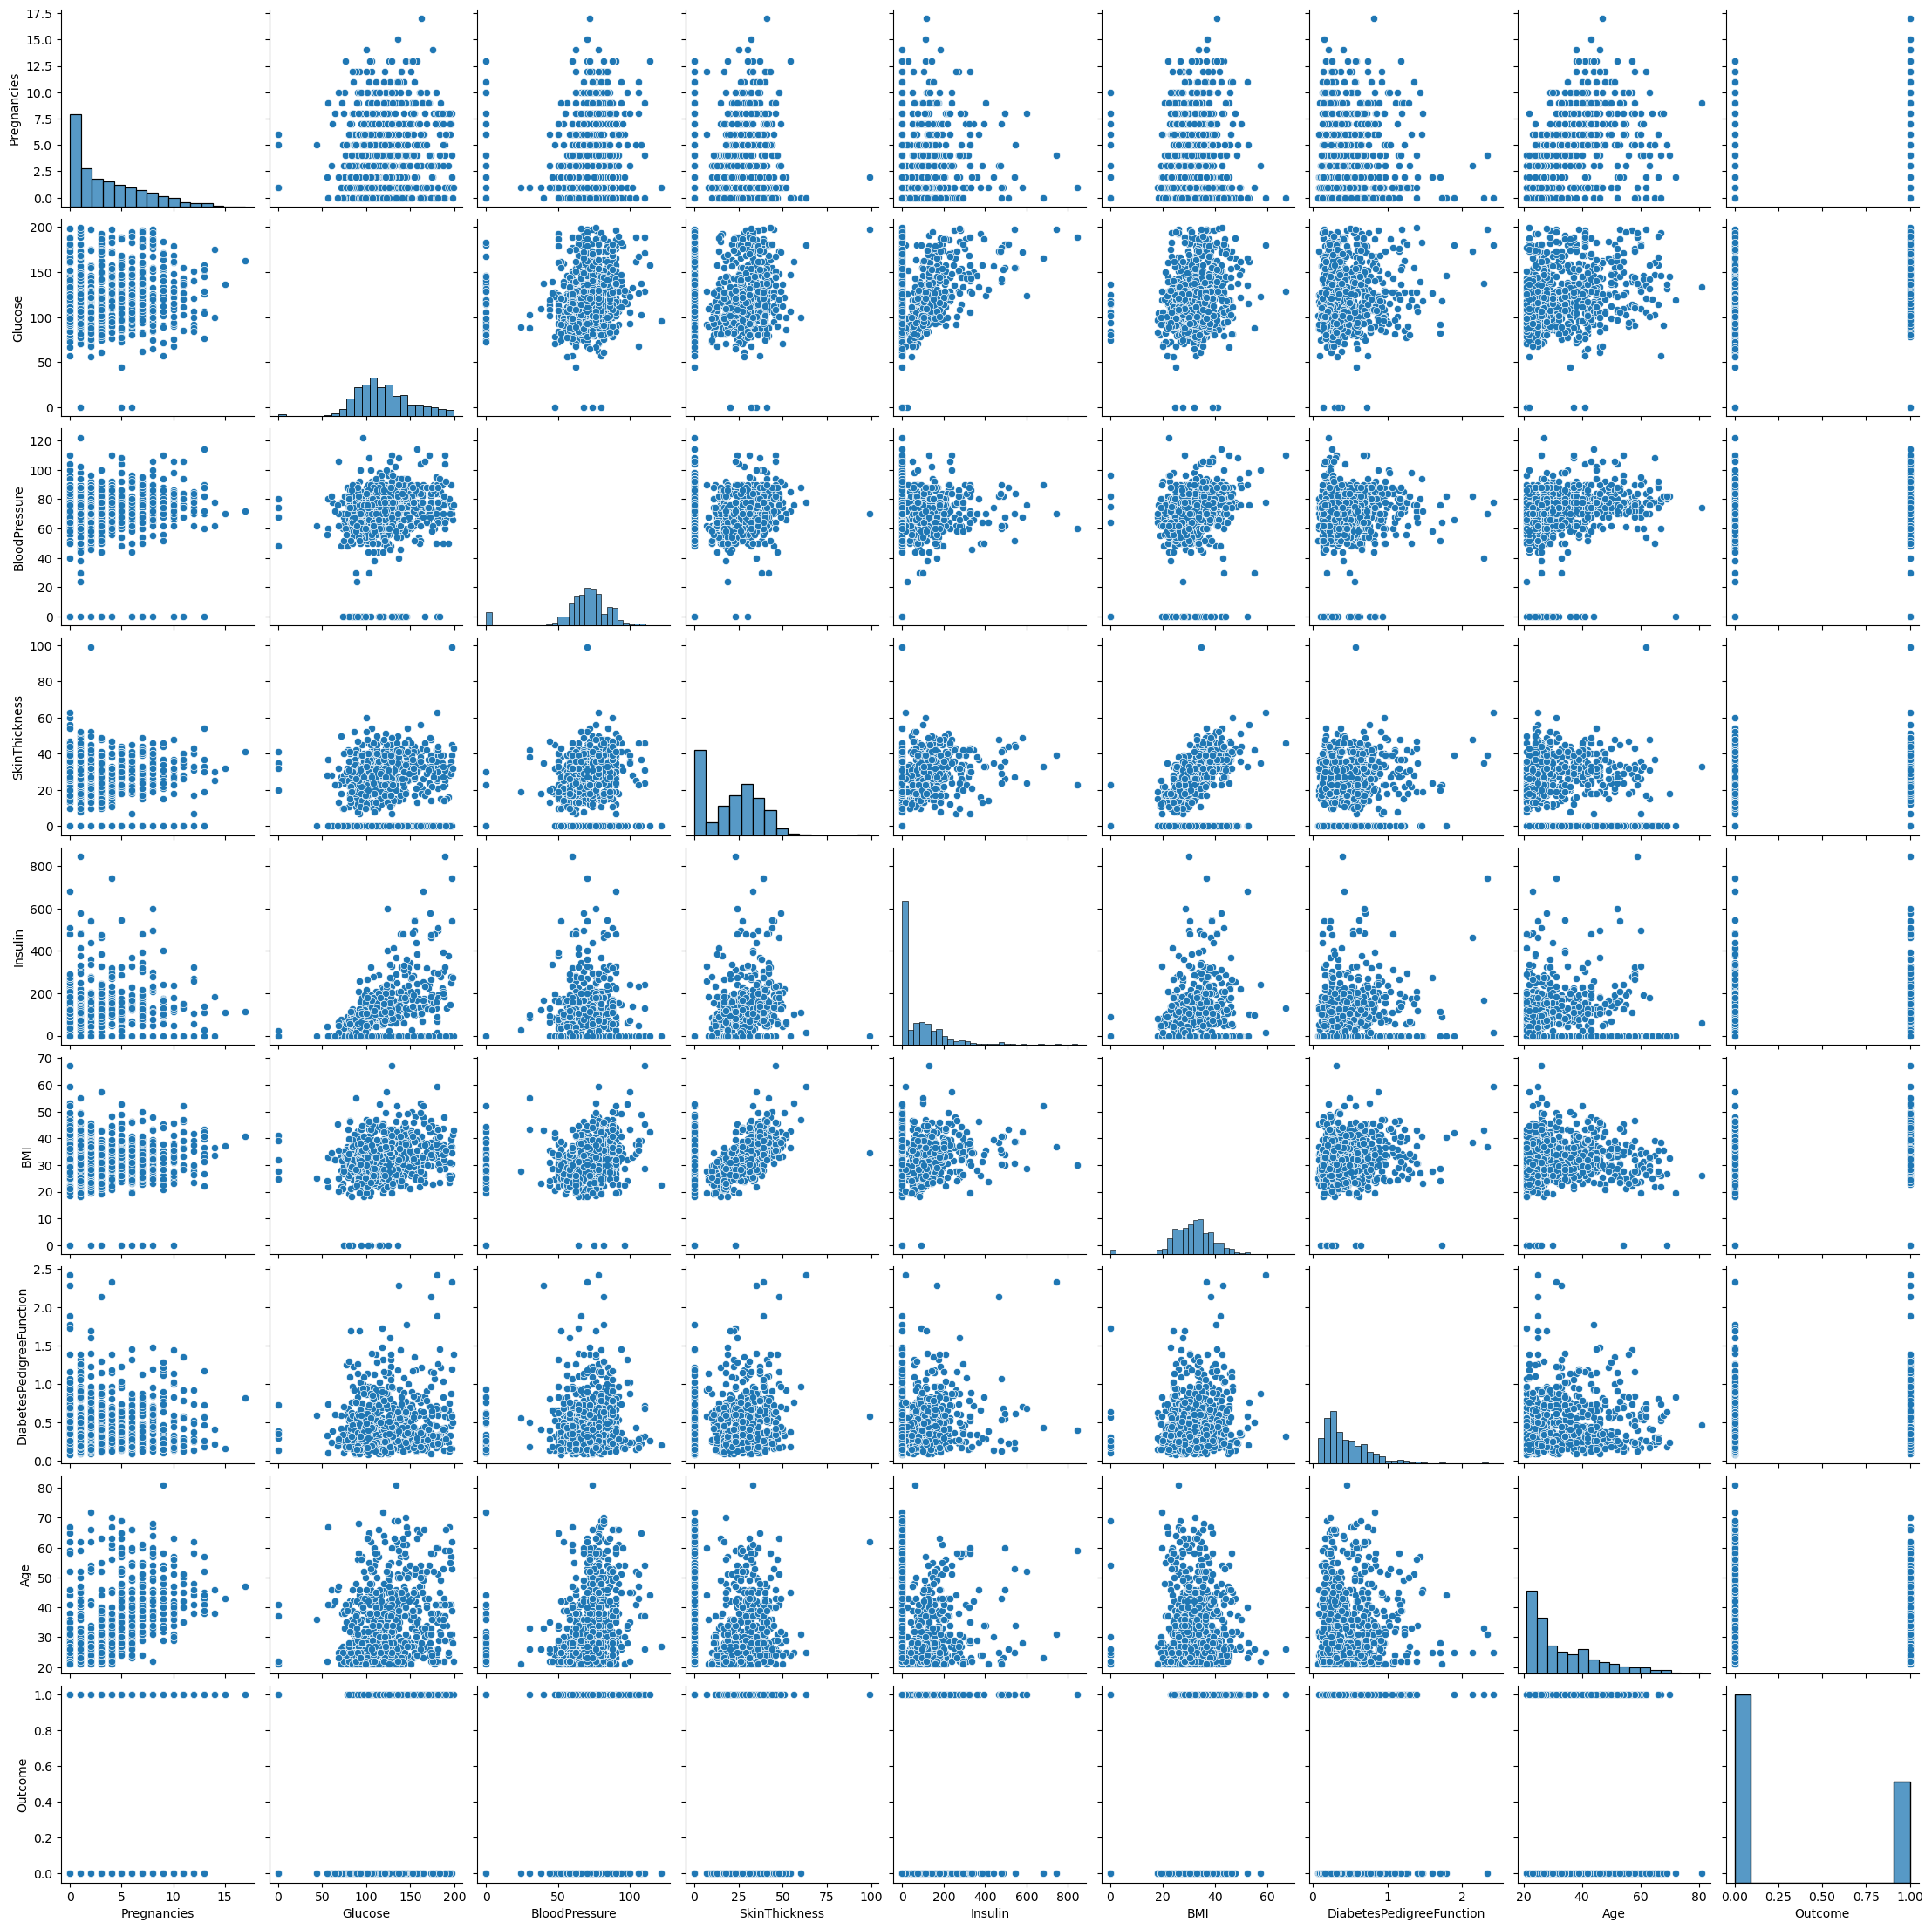

In [10]:
sns.pairplot(df)
plt.show()

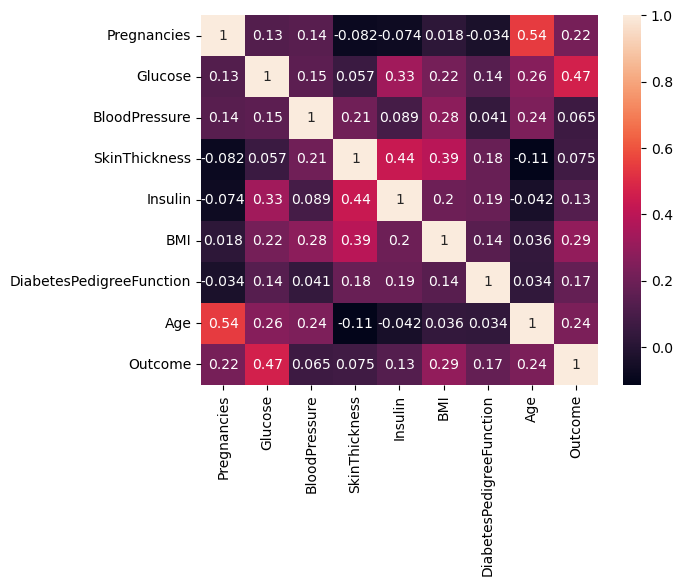

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [12]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [13]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [14]:
df["BloodPressure"].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

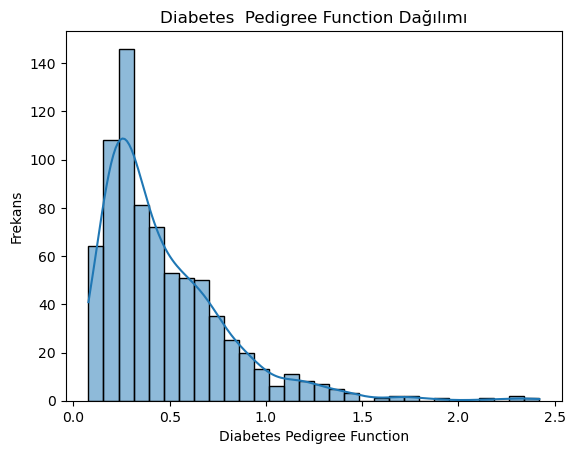

In [16]:
sns.histplot(df["DiabetesPedigreeFunction"], bins=30, kde=True)
plt.title("Diabetes  Pedigree Function Dağılımı")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Frekans")
plt.show()

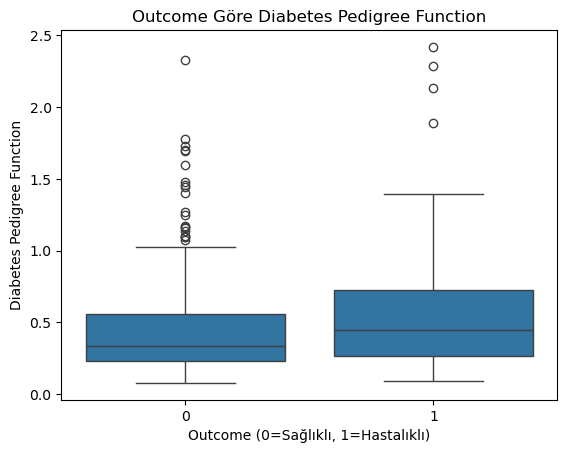

In [17]:
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df)
plt.title("Outcome Göre Diabetes Pedigree Function")
plt.xlabel("Outcome (0=Sağlıklı, 1=Hastalıklı)")
plt.ylabel("Diabetes Pedigree Function")
plt.show()

In [19]:
# Train Test
X = df.drop(["Outcome", "SkinThickness", "Insulin"], axis=1)
y = df["Outcome"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [23]:
columns_to_fill = ["Glucose", "BloodPressure", "BMI"]

In [24]:
medians = {}

for col in columns_to_fill:
    medians_value = X_train[X_train[col] !=0][col].median()
    medians[col] = medians_value
    X_train[col] = X_train[col].replace(0, medians[col])

In [25]:
X_train.describe()

Pregnancies     Glucose  BloodPressure         BMI  \
count   614.000000  614.000000     614.000000  614.000000   
mean      3.907166  121.560261      72.612378   32.448208   
std       3.385438   29.974412      12.165642    6.862948   
min       0.000000   44.000000      24.000000   18.200000   
25%       1.000000  100.000000      64.000000   27.600000   
50%       3.000000  117.000000      72.000000   32.300000   
75%       6.000000  139.750000      80.000000   36.500000   
max      17.000000  199.000000     122.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                614.000000  614.000000  
mean                   0.469948   33.285016  
std                    0.328516   11.678337  
min                    0.084000   21.000000  
25%                    0.238250   24.000000  
50%                    0.370500   29.000000  
75%                    0.630750   40.000000  
max                    2.420000   81.000000

In [26]:
X_test.describe()

Pregnancies     Glucose  BloodPressure         BMI  \
count   154.000000  154.000000     154.000000  154.000000   
mean      3.597403  122.038961      67.746753   32.273377   
std       3.304818   32.320876      19.816004    7.423008   
min       0.000000   61.000000       0.000000    0.000000   
25%       1.000000   95.250000      62.000000   26.800000   
50%       3.000000  117.000000      70.000000   32.200000   
75%       5.750000  142.750000      80.000000   36.950000   
max      13.000000  197.000000     106.000000   55.000000   

       DiabetesPedigreeFunction         Age  
count                154.000000  154.000000  
mean                   0.479565   33.064935  
std                    0.343303   12.118519  
min                    0.078000   21.000000  
25%                    0.254000   24.000000  
50%                    0.376500   28.000000  
75%                    0.603750   41.000000  
max                    2.329000   69.000000

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [31]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.7402597402597403
Confusion Matrix: 
 [[87 21]
 [19 27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       108
           1       0.56      0.59      0.57        46

    accuracy                           0.74       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.74      0.74      0.74       154



In [32]:
# Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
adaboost_param = {
    "n_estimator" : [50, 70, 100, 120, 150, 200],
    "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [35]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=adaboost_param, n_jobs=-1, cv=5, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


ValueError: Invalid parameter 'n_estimator' for estimator AdaBoostClassifier(learning_rate=0.001). Valid parameters are: ['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].